In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [2]:
client_df=pd.read_csv("client_data.csv")
price_df=pd.read_csv("price_data.csv")

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [6]:
# Rename the columns with more expressive names
client_df.rename(columns={
    'id': 'client_id',
    'activity_new': 'company_act_category',
    'cons_12m': 'electricity_cons_12m',
    'cons_gas_12m': 'gas_cons_12m',
    'cons_last_month': 'electricity_cons_last_month',
    'date_activ': 'contract_activ_date',
    'date_end': 'contract_end_date',
    'date_modif_prod': 'last_product_modification_date',
    'date_renewal': 'next_contract_renewal_date',
    'forecast_cons_12m': 'electricity_forecast_cons_12m',
    'forecast_cons_year': 'electricity_forecast_cons_NX_year',
    'forecast_price_energy_off_peak': 'forecasted_off_peak_energy_price',
    'forecast_price_energy_peak': 'forecasted_peak_energy_price',
    'forecast_price_pow_off_peak': 'forecasted_off_peak_power_price',
    'imp_cons': 'current_paid_cons',
    'margin_gross_pow_ele': 'gross_margin_electricity_subscription',
    'margin_net_pow_ele': 'net_margin_electricity_subscription',
    'nb_prod_act': 'active_products_and_services_count',
    'net_margin': 'total_net_margin',
    'num_years_antig': 'client_antiquity_years',
    'origin_up': 'initial_subscription_campaign_code',
    'pow_max': 'max_subscribed_power',
}, inplace=True)


In [7]:
client_df.head()

,client_id,channel_sales,electricity_cons_12m,gas_cons_12m,electricity_cons_last_month,contract_activ_date,contract_end_date,last_product_modification_date,next_contract_renewal_date,electricity_forecast_cons_12m,...,has_gas,current_paid_cons,gross_margin_electricity_subscription,net_margin_electricity_subscription,active_products_and_services_count,total_net_margin,client_antiquity_years,initial_subscription_campaign_code,max_subscribed_power,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


### Before I start to work on the dataset and answer the client's `"PowerCo"` Inquiry, I need first to grasp a full, holistic understanding of the utilities and power providers' company. In other words, I need to understand some of the features included in the dataset to be able to work effectively.
PDF Attached

# EDA

In [8]:
print(f'{client_df.info()} \n{price_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   client_id                              14606 non-null  object 
 1   channel_sales                          14606 non-null  object 
 2   electricity_cons_12m                   14606 non-null  int64  
 3   gas_cons_12m                           14606 non-null  int64  
 4   electricity_cons_last_month            14606 non-null  int64  
 5   contract_activ_date                    14606 non-null  object 
 6   contract_end_date                      14606 non-null  object 
 7   last_product_modification_date         14606 non-null  object 
 8   next_contract_renewal_date             14606 non-null  object 
 9   electricity_forecast_cons_12m          14606 non-null  float64
 10  electricity_forecast_cons_NX_year      14606 non-null  int64  
 11  fo

👆quick glimpse; no missing value, some data type errors to be handled

In [9]:
client_numerical_features = client_df.select_dtypes(include=['number'])
client_categorical_features = client_df.select_dtypes(include=['object'])

In [10]:
client_numerical_features.describe()

,electricity_cons_12m,gas_cons_12m,electricity_cons_last_month,electricity_forecast_cons_12m,electricity_forecast_cons_NX_year,forecast_discount_energy,forecast_meter_rent_12m,forecasted_off_peak_energy_price,forecasted_peak_energy_price,forecasted_off_peak_power_price,current_paid_cons,gross_margin_electricity_subscription,net_margin_electricity_subscription,active_products_and_services_count,total_net_margin,client_antiquity_years,max_subscribed_power,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
client_categorical_features.describe()

,client_id,channel_sales,contract_activ_date,contract_end_date,last_product_modification_date,next_contract_renewal_date,has_gas,initial_subscription_campaign_code
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,563dde550fd624d7352f3de77c0cdfcd,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


In [12]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


👆The data looks to be skewed, let's visualize it for better understanding

# Vizualization `client dataset`

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

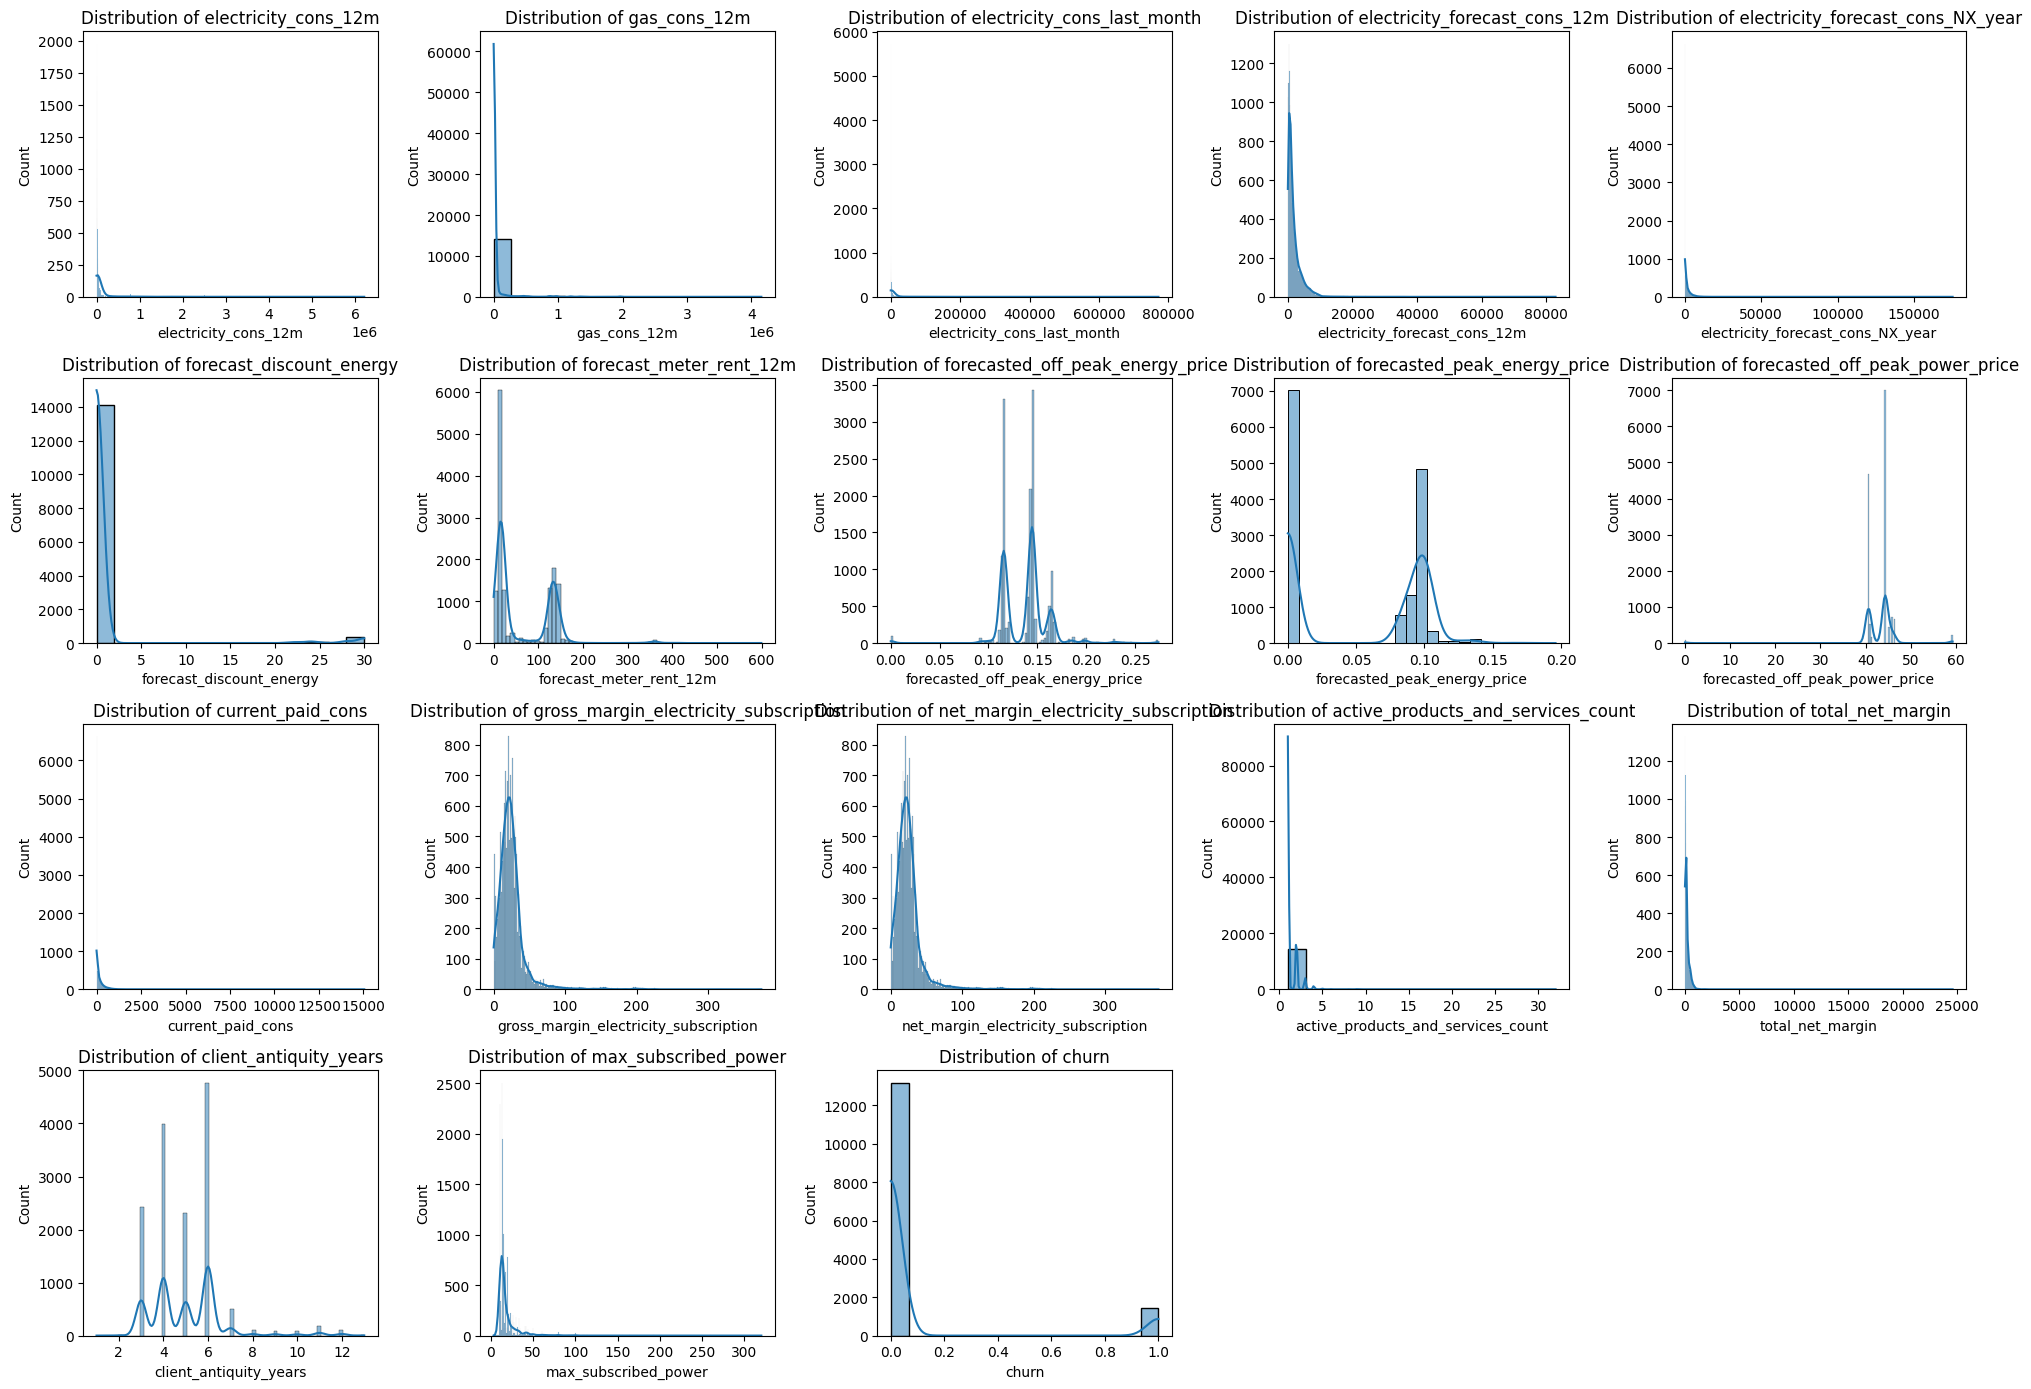

In [14]:
plt.figure(figsize=(20, 14))
for i, col in enumerate(client_numerical_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(client_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

👆The dataset is indeed right-skewed, hence, I'll need to apply a log transformation.

**key notes**:
- what is Log trans
- why we perform it
- when to perform it, do we alwas need to perform it

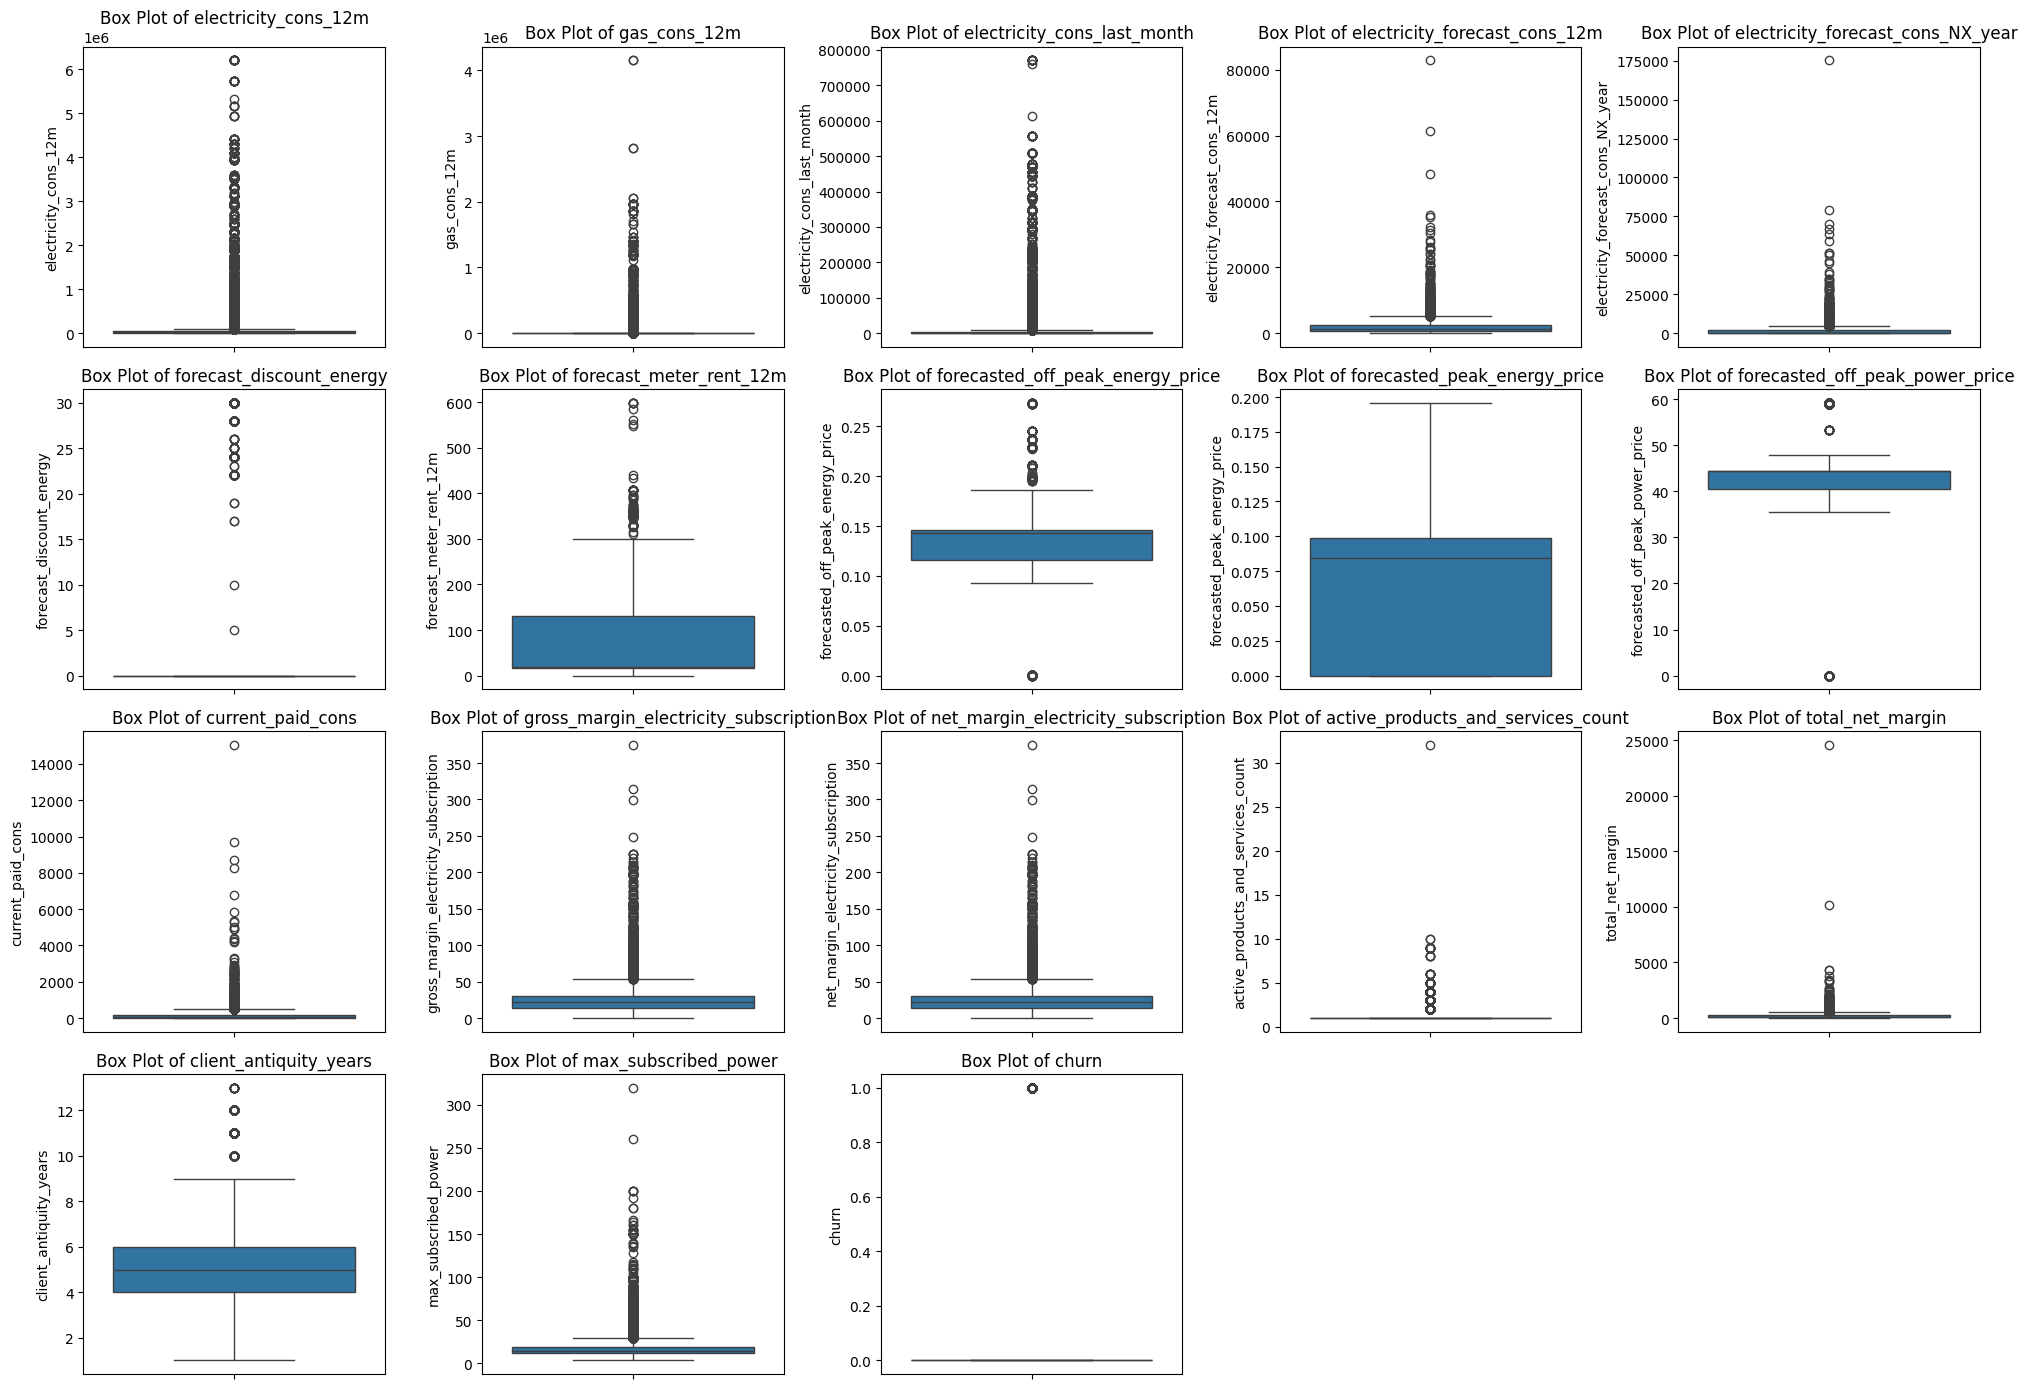

In [15]:
# Box plots
plt.figure(figsize=(20, 14))
for i, col in enumerate(client_numerical_features):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=client_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [16]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


👆 Lot's of outliers that will need to be handeled.

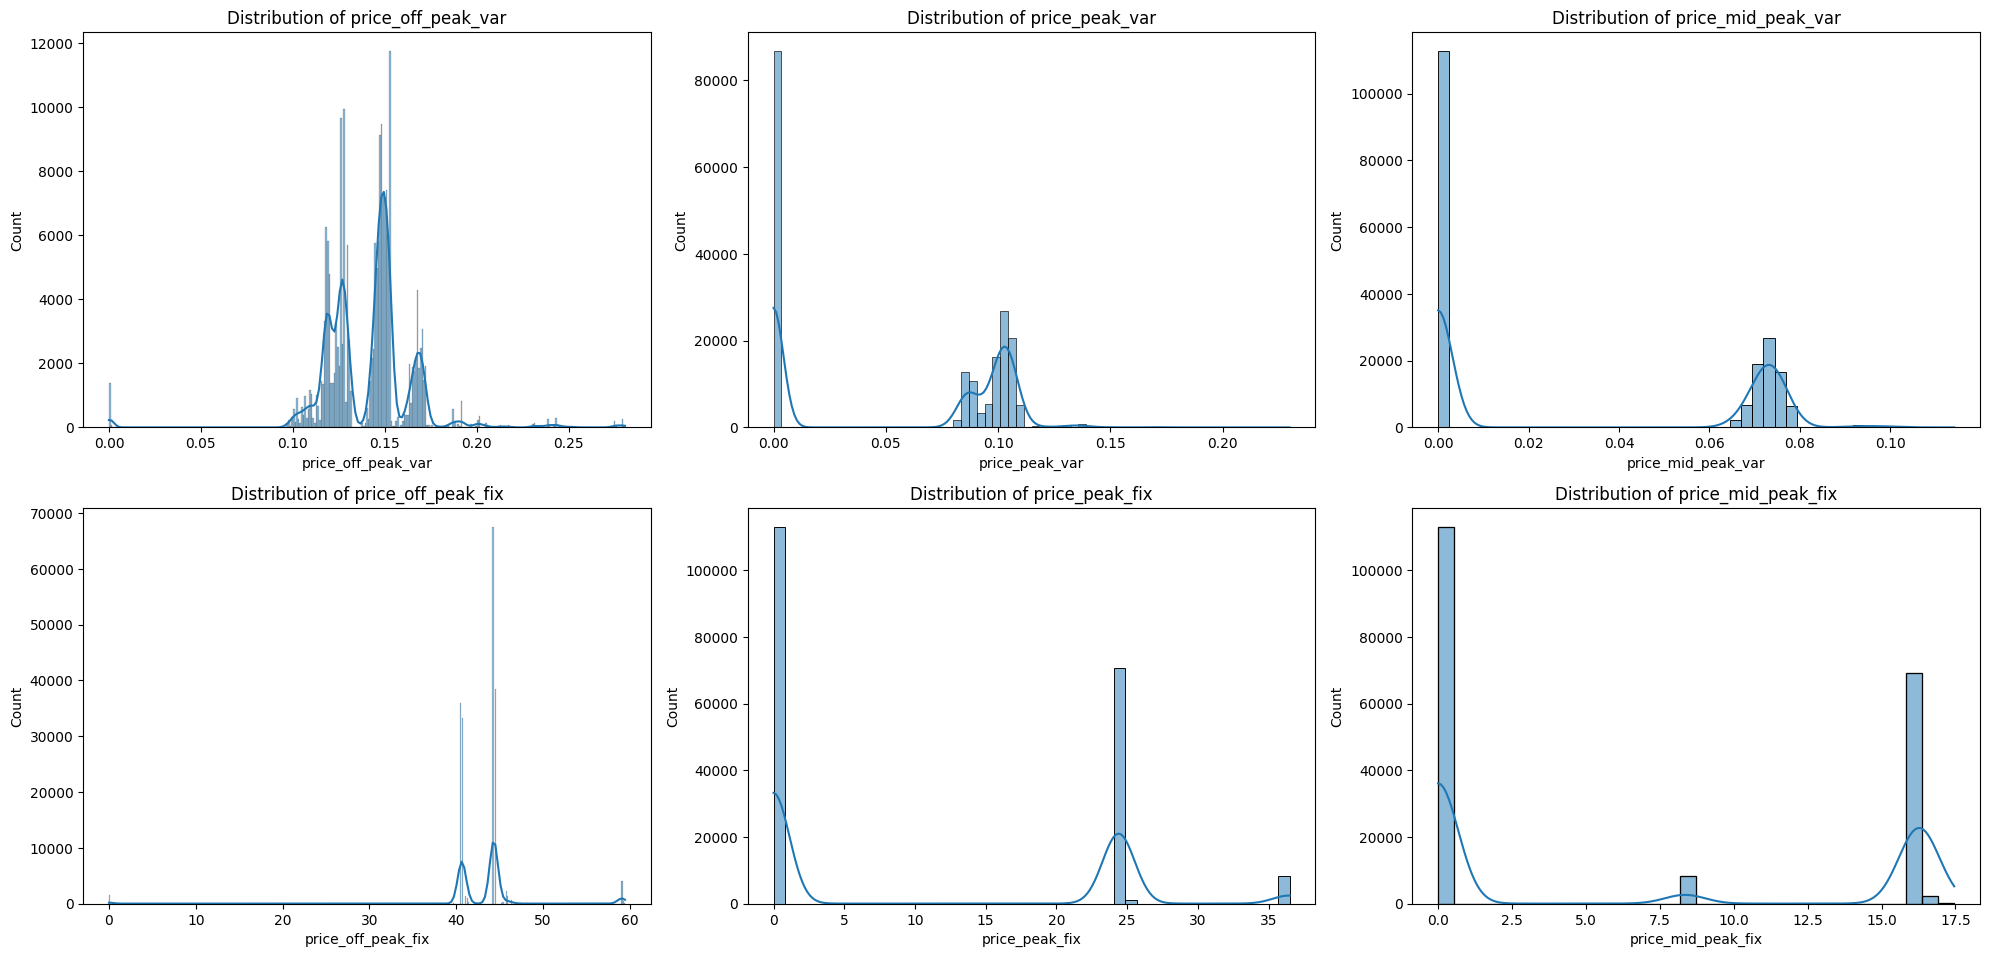

In [17]:
price_numerical_features = price_df.select_dtypes(include=['number'])


plt.figure(figsize=(20, 14))
for i, col in enumerate(price_numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(price_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

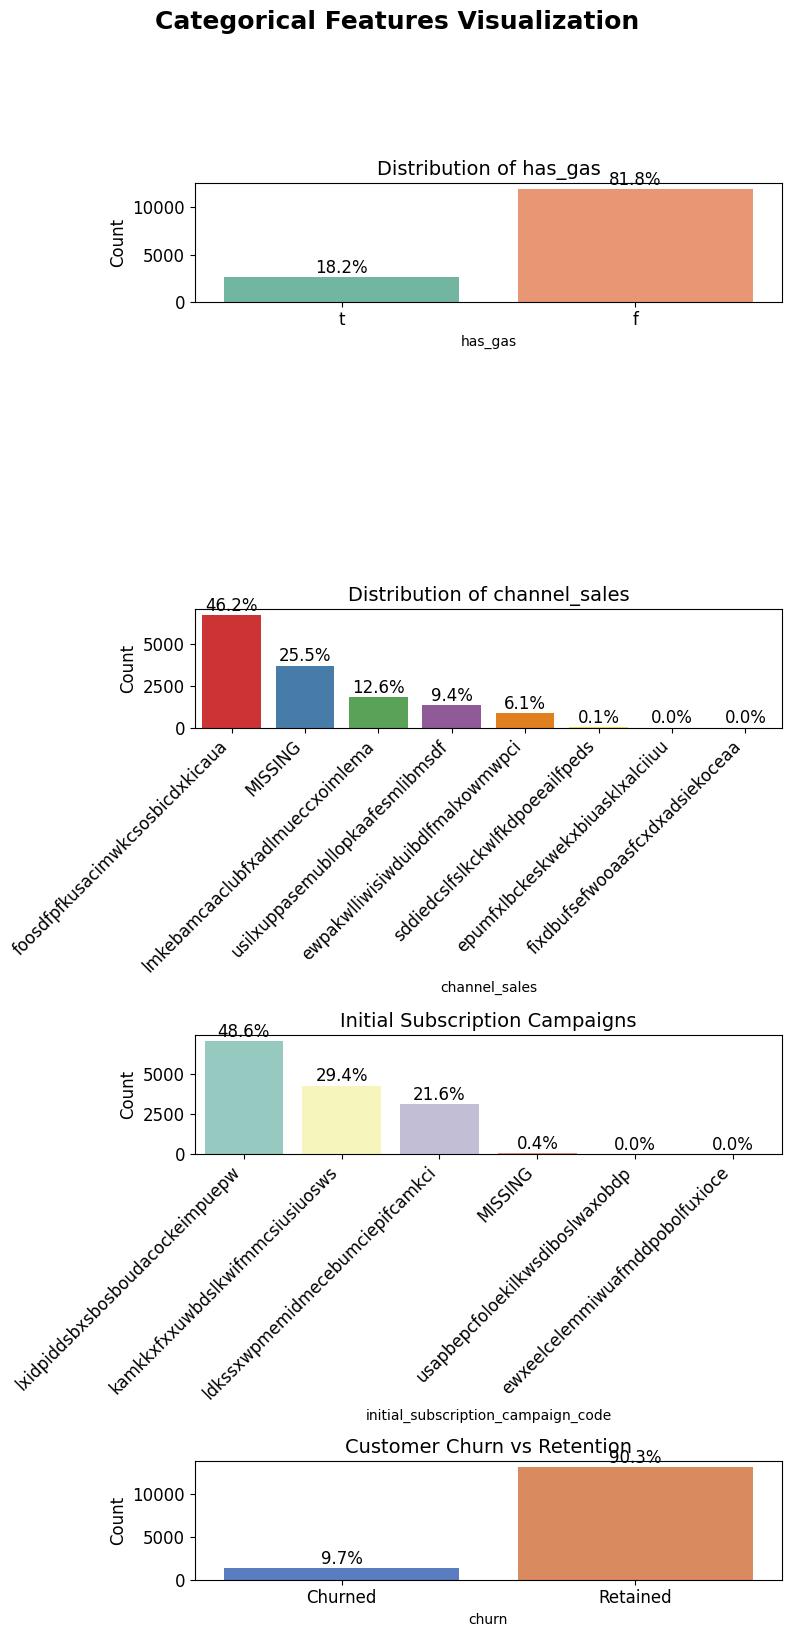

In [18]:
# Create a figure with subplots (4 rows and 1 column)
fig, axes = plt.subplots(4, 1, figsize=(8, 16))
fig.suptitle('Categorical Features Visualization', fontsize=18, fontweight='bold', y=1.02)

# 1.has_gas
sns.countplot(x='has_gas', data=client_df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of has_gas', fontsize=14)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
# Center the x-axis tick labels
for label in axes[0].get_xticklabels():
    label.set_horizontalalignment('center')
# Add percentage labels
total = len(client_df['has_gas'])
for p in axes[0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() + 10),
                     ha='center', va='bottom', fontsize=12)

# 2.channel_sales
channel_counts = client_df['channel_sales'].value_counts()
sns.barplot(x=channel_counts.index, y=channel_counts.values, ax=axes[1], palette='Set1')
axes[1].set_title('Distribution of channel_sales', fontsize=14)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', labelsize=12, rotation=45)
axes[1].tick_params(axis='y', labelsize=12)
# Center the x-axis tick labels
for label in axes[1].get_xticklabels():
    label.set_horizontalalignment('right')
# Add percentage labels
total = channel_counts.sum()
for i, p in enumerate(axes[1].patches):
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() + 10),
                     ha='center', va='bottom', fontsize=12)

# 3.initial_subscription_campaign_code
campaign_counts = client_df['initial_subscription_campaign_code'].value_counts()
sns.barplot(x=campaign_counts.index, y=campaign_counts.values, ax=axes[2], palette='Set3')
axes[2].set_title('Initial Subscription Campaigns', fontsize=14)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].tick_params(axis='x', labelsize=12, rotation=45)
axes[2].tick_params(axis='y', labelsize=12)
# Center the x-axis tick labels
for label in axes[2].get_xticklabels():
    label.set_horizontalalignment('right')
# Add percentage labels
total = client_df['initial_subscription_campaign_code'].count()
for i, p in enumerate(axes[2].patches):
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[2].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() + 10),
                     ha='center', va='bottom', fontsize=12)

# 4.1. Convert churn to churn/retention and visualize
client_df['churn'] = client_df['churn'].map({1: 'Churned', 0: 'Retained'})
# 4.2. vizualize churn
sns.countplot(x='churn', data=client_df, ax=axes[3], palette='muted')
axes[3].set_title('Customer Churn vs Retention', fontsize=14)
axes[3].set_ylabel('Count', fontsize=12)
axes[3].tick_params(axis='x', labelsize=12)
axes[3].tick_params(axis='y', labelsize=12)
# Center the x-axis tick labels
for label in axes[3].get_xticklabels():
    label.set_horizontalalignment('center')
# Add percentage labels
total = len(client_df['churn'])
for p in axes[3].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[3].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() + 10),
                     ha='center', va='bottom', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


👆 **Important observations:**
- Most of the company customers don't have gas, meaning we might need to focus more on the electricity prices, etc.
- The least three channel codes, `sddiedcslfslkckwlfkdpoeeailfpeds`, `epumfxlbckeskwekxbiuasklxalciiuu`, `fixdbufsefwooaasfcxdxadsiekoceaa` have nearly zero impact on the company's sales. I may delete them during the feature engineering process.
- same as with the initial subscription_campaign
- there is data imbalance `Churn`, `has_gas`

In [19]:
def plot_churn_percentage(feature, df=client_df, colormap='cividis', rotation=0, figsize=(8, 6)):

    # Calculate the percentage of churn based on the given feature values
    churn_gas_percentage = df.groupby([feature, 'churn']).size().unstack(fill_value=0)

    # Convert counts to percentages based on the given feature values
    churn_gas_percentage = churn_gas_percentage.div(churn_gas_percentage.sum(axis=1), axis=0) * 100

    # Sort the values in ascending order based on churn percentage (ascending order for 'Churned')
    churn_gas_percentage = churn_gas_percentage[['Retained', 'Churned']].sort_values(by='Churned', ascending= False)

    # Plot stacked bar chart for percentage comparison
    ax = churn_gas_percentage.plot(kind='bar', stacked=True, figsize=figsize, colormap=colormap)

    # Add percentage labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # only label bars with non-zero height
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + p.get_y(),
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

    # Adjust the alignment of the x-tick labels
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    # Improve chart appearance
    plt.title(f'Percentage of Customer Churn by {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=rotation,fontsize=14)
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()

    plt.show()


### Churn Vs Client's gas Status

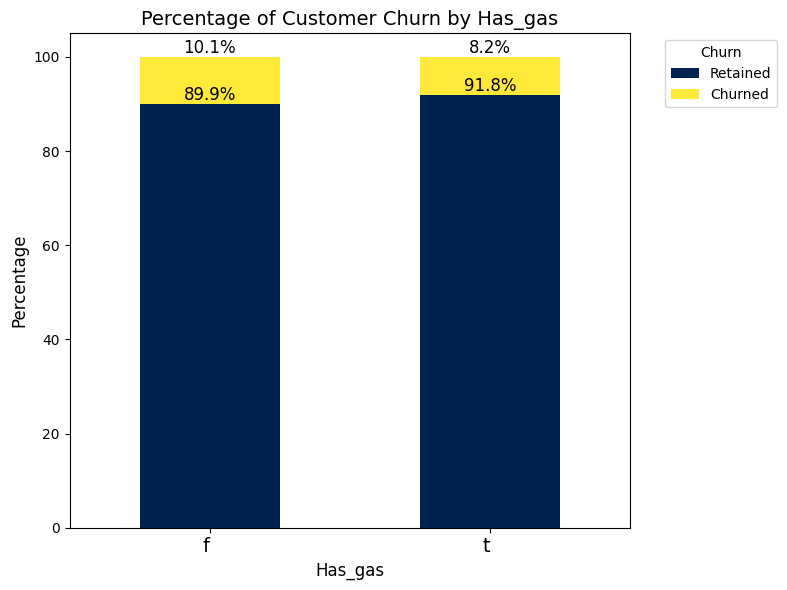

In [20]:
plot_churn_percentage('has_gas')

### Churn VS Sales Channels

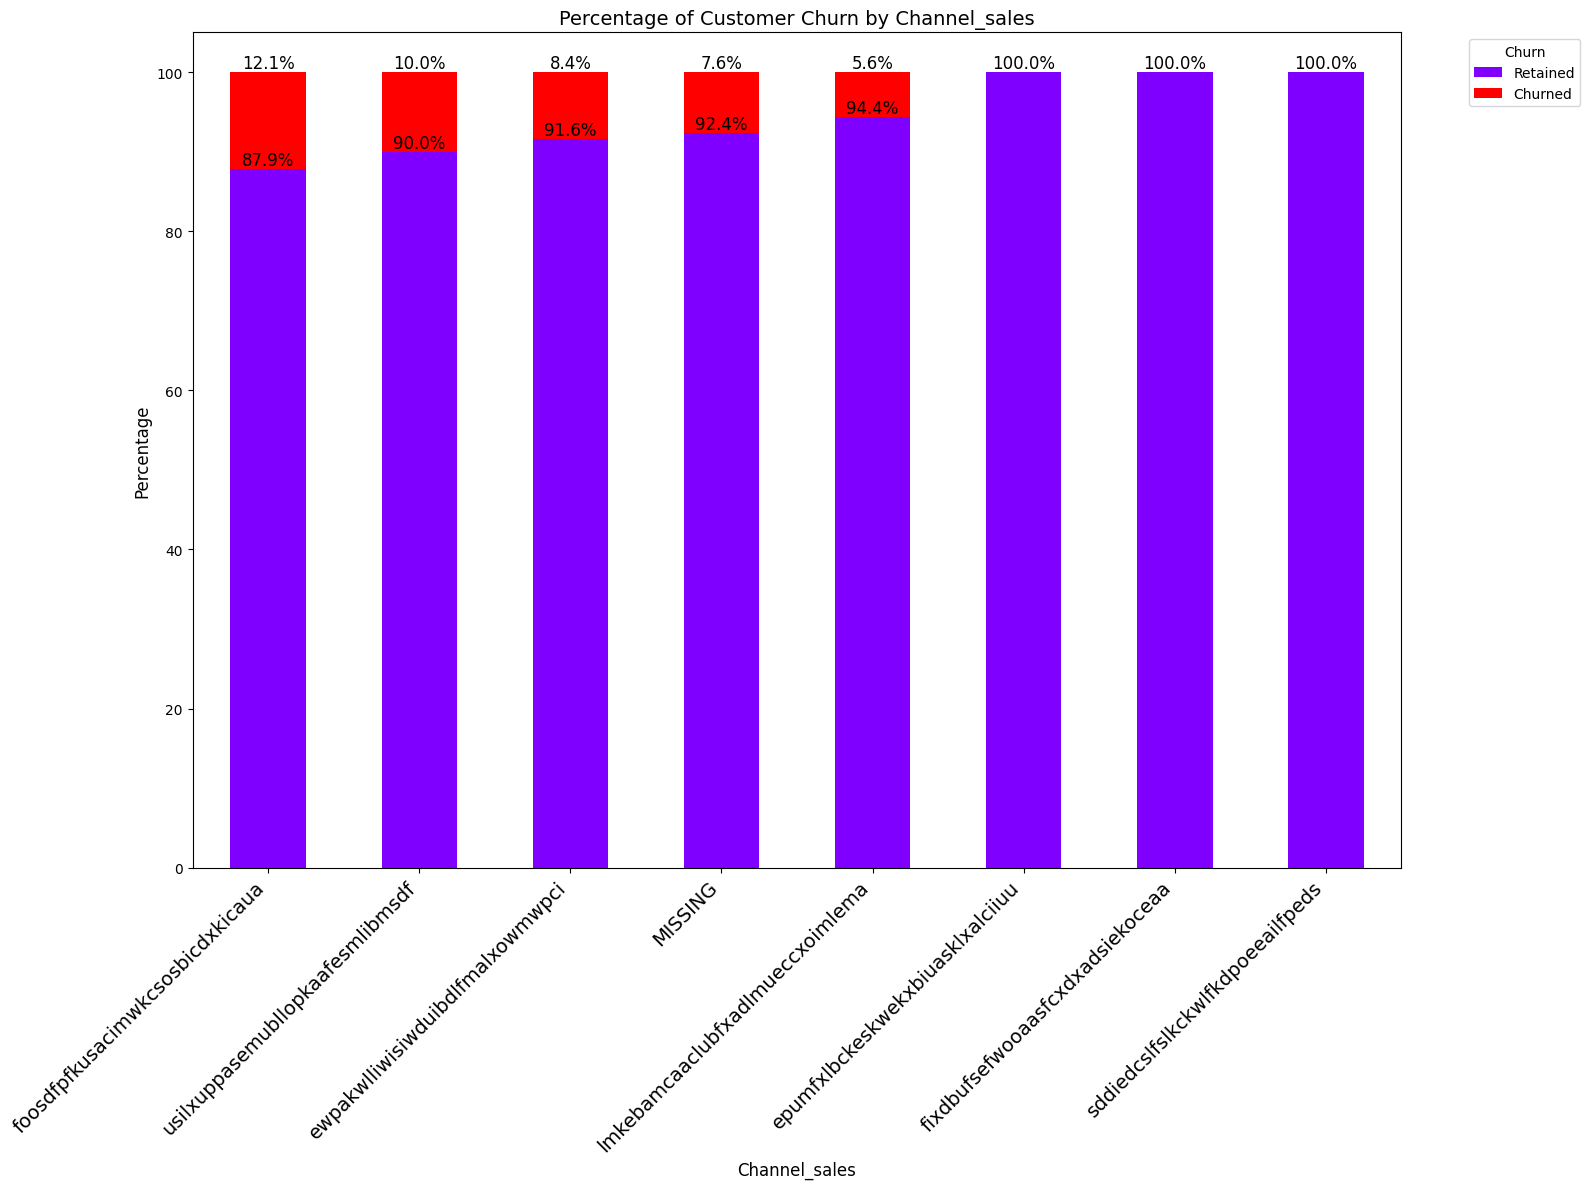

In [21]:
plot_churn_percentage('channel_sales',colormap='rainbow', rotation=45, figsize=(16,12))

## Investigating the Relationship Between Price and Churn
- I need to test the hypothesis of whether the price is the most influential feature on the churning or not

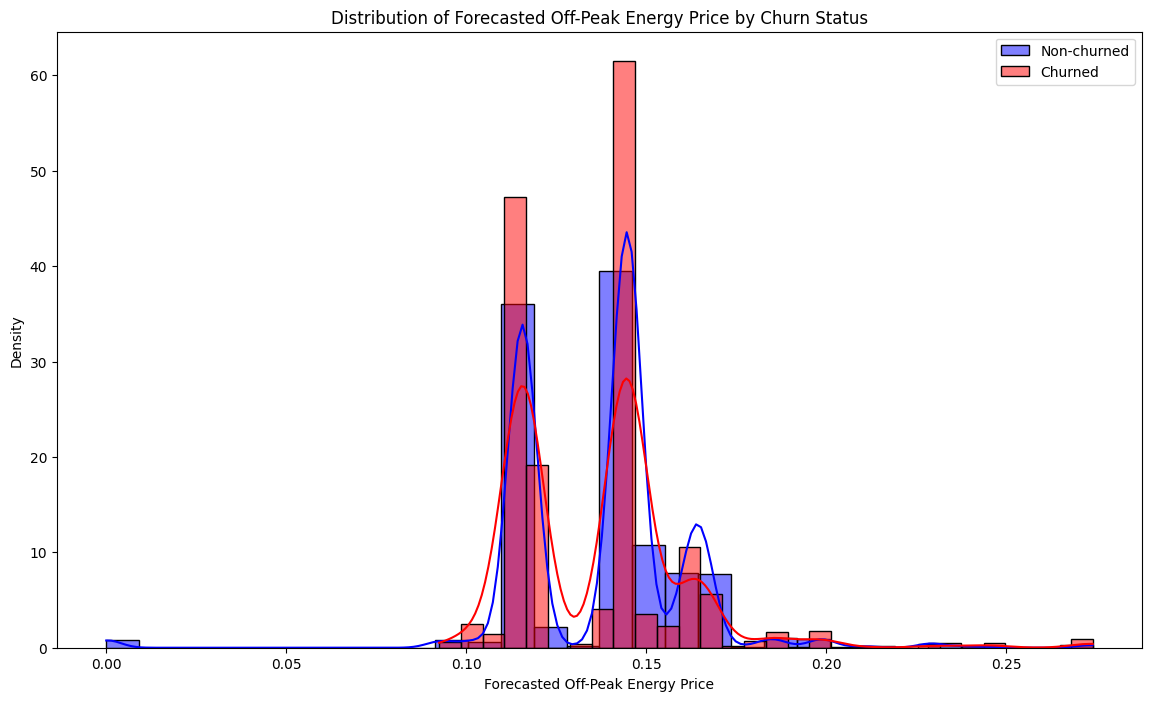

In [22]:
# Set up the figure for plotting
plt.figure(figsize=(14, 8))

# Plot the distribution of forecasted price features for churned vs non-churned customers
sns.histplot(client_df[client_df['churn'] == 'Retained']['forecasted_off_peak_energy_price'], kde=True, color='blue', label='Non-churned', stat='density', bins=30)
sns.histplot(client_df[client_df['churn'] == 'Churned']['forecasted_off_peak_energy_price'], kde=True, color='red', label='Churned', stat='density', bins=30)
plt.title('Distribution of Forecasted Off-Peak Energy Price by Churn Status')
plt.xlabel('Forecasted Off-Peak Energy Price')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

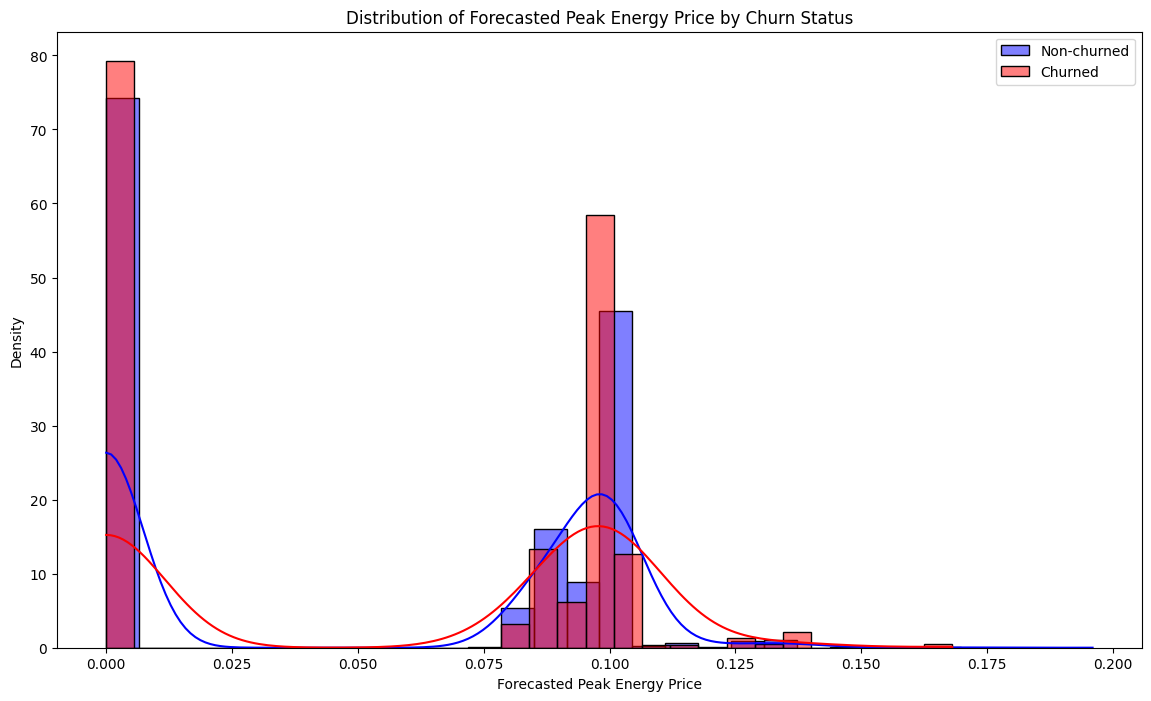

In [23]:
plt.figure(figsize=(14, 8))
sns.histplot(client_df[client_df['churn'] == 'Retained']['forecasted_peak_energy_price'], kde=True, color='blue', label='Non-churned', stat='density', bins=30)
sns.histplot(client_df[client_df['churn'] == 'Churned']['forecasted_peak_energy_price'], kde=True, color='red', label='Churned', stat='density', bins=30)
plt.title('Distribution of Forecasted Peak Energy Price by Churn Status')
plt.xlabel('Forecasted Peak Energy Price')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

👆 From my point of view, Using forecasted prices to assess price sensitivity isn't as reliable for testing whether customers are truly price-sensitive, as those are hypothetical prices, not actual historical prices that customers experienced.

👇 To truly assess price sensitivity, we should focus on the historical prices (e.g., `price_off_peak_var`, `price_peak_var`) provided in the **price_data.csv**.

In [24]:
price_df.rename(columns={
    'id': 'client_id'
}, inplace=True)


In [25]:
# Merge client data with price data on 'id' to associate churn status with price data
price_data_merged = price_df.merge(client_df[['client_id', 'churn','forecasted_off_peak_energy_price','forecasted_peak_energy_price', 'forecasted_off_peak_power_price']], on='client_id', how='inner')

In [26]:
price_data_merged

,client_id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,forecasted_off_peak_energy_price,forecasted_peak_energy_price,forecasted_off_peak_power_price
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,Retained,0.14398,0.000000,44.311378
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,Retained,0.14398,0.000000,44.311378
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,Retained,0.14398,0.000000,44.311378
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,Retained,0.14398,0.000000,44.311378
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,Retained,0.14398,0.000000,44.311378
...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,Retained,0.11691,0.100572,40.606701
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,Retained,0.11691,0.100572,40.606701
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,Retained,0.11691,0.100572,40.606701
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,Retained,0.11691,0.100572,40.606701


In [27]:
price_data_merged['churn']=price_data_merged['churn'].map({'Churned':0, 'Retained':1})

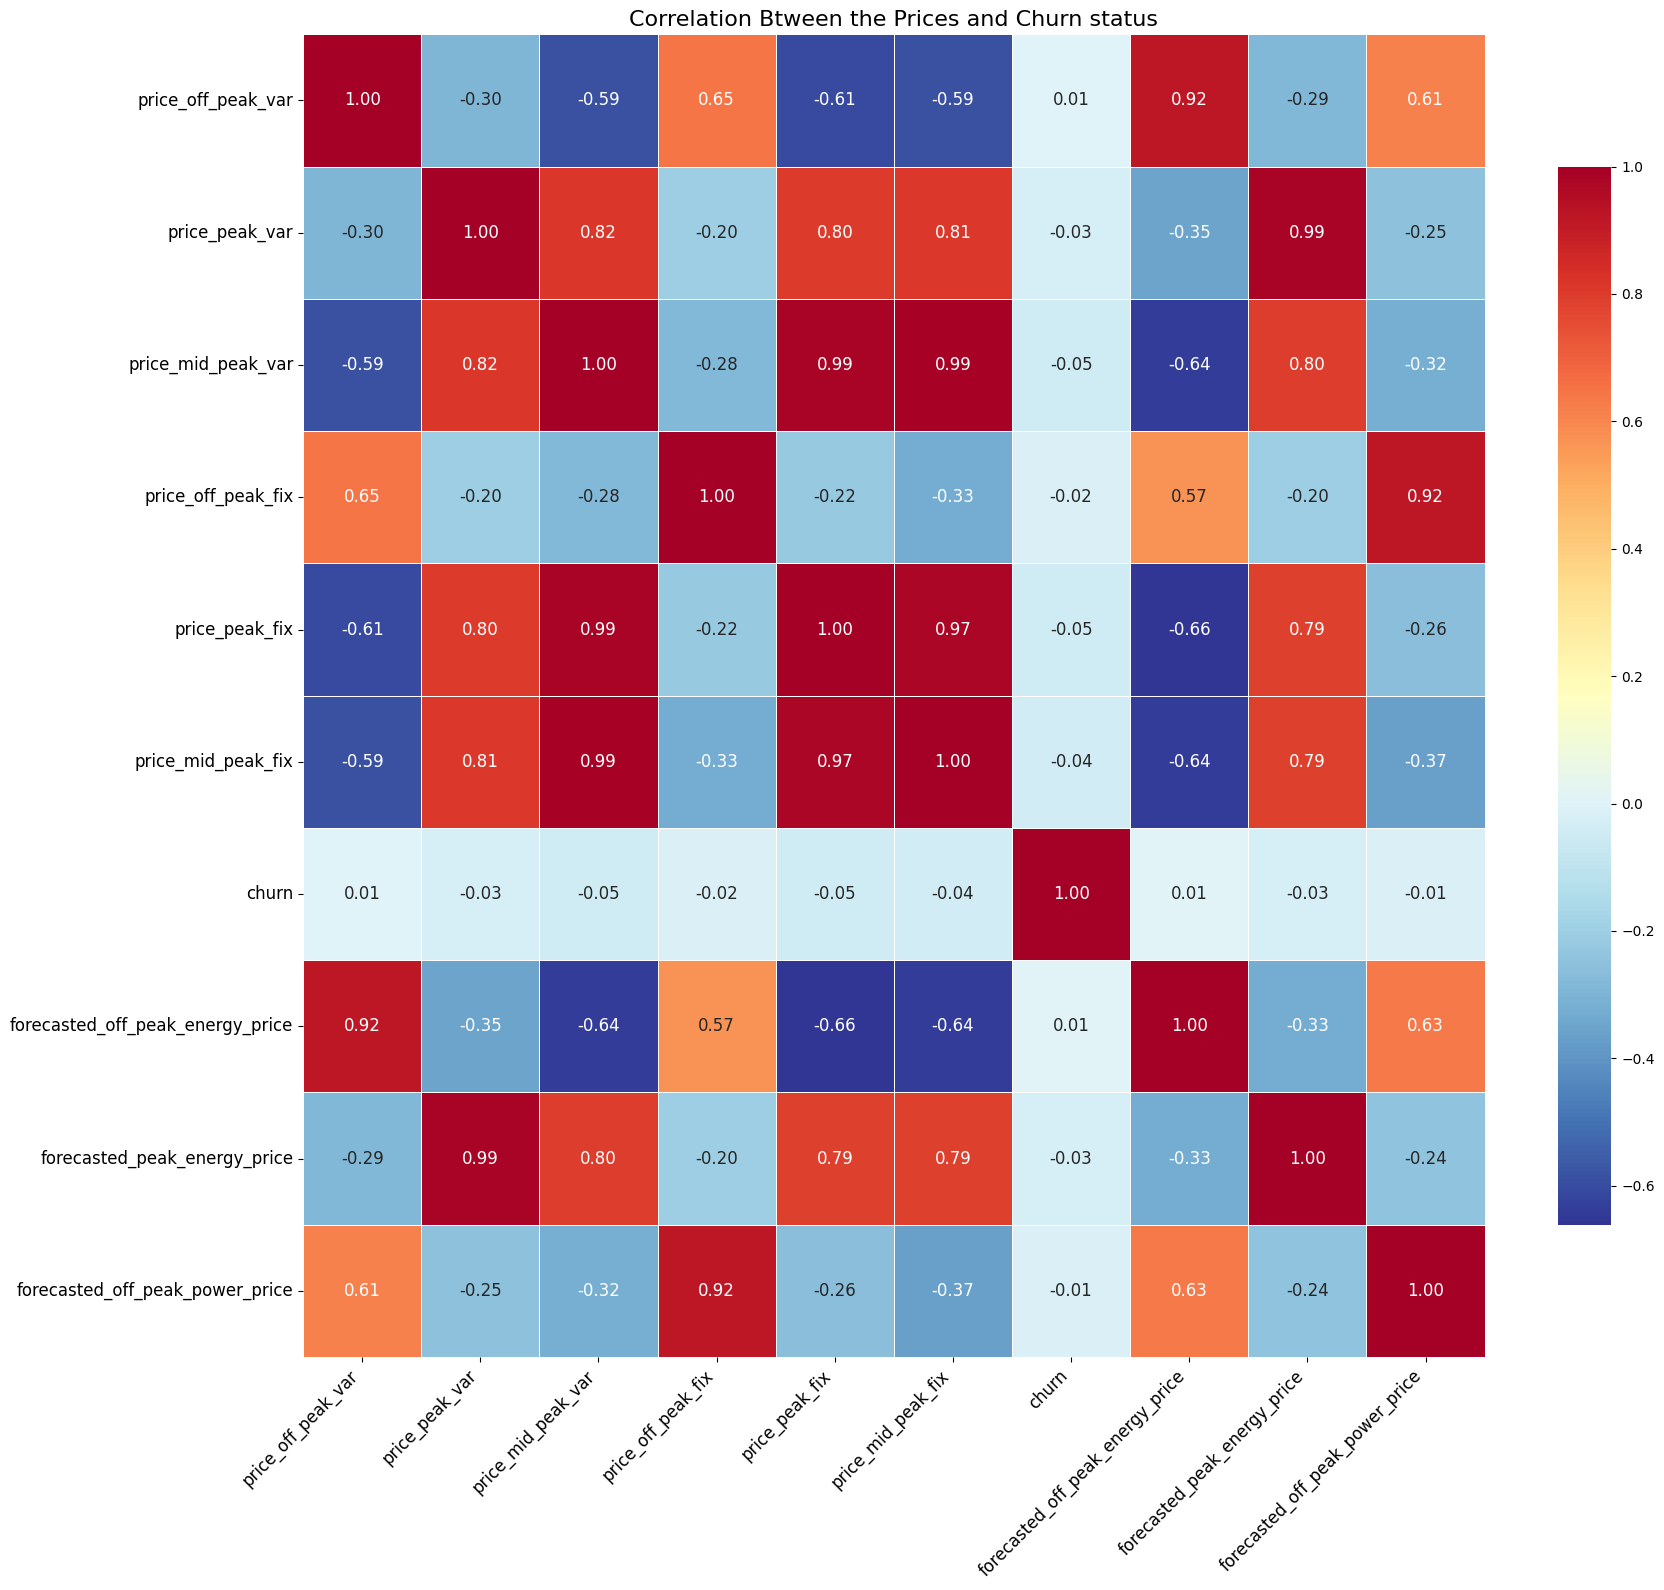

In [28]:
corr = price_data_merged[['price_off_peak_var', 'price_peak_var',
                           'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
                           'price_mid_peak_fix', 'churn', 'forecasted_off_peak_energy_price',
                           'forecasted_peak_energy_price', 'forecasted_off_peak_power_price']].corr()

plt.figure(figsize=(18,16))

sns.heatmap(corr,
            annot=True,
            cmap='RdYlBu_r',
            annot_kws={'size': 12},
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Btween the Prices and Churn status', fontsize=16)

# Adjust axis labels and ticks
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

👆Looks like the price features are not correlated with churning status; however, this is not enough to determine whether or not a customer is sensitive to the price. To test this, we need to calculate the differences in the prices over a period and identify whether a customer churns after a change in the price or not

The price dataset presents distinct price matrices for each of **PowerCo's** clients over the course of the year `2015`. Prices for each of the `14,606` companies are calculated on the first day of every month.

👇To assess whether price sensitivity contributes to churn, I will group the data by distinct time periods and analyze whether changes in price correlate with instances of churn

In [29]:
price_data_merged

,client_id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,forecasted_off_peak_energy_price,forecasted_peak_energy_price,forecasted_off_peak_power_price
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378
...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701


In [30]:
price_data_merged['price_date'] = pd.to_datetime(price_data_merged['price_date'])

price_data_merged['price_month'] = price_data_merged['price_date'].dt.month

In [31]:
monthly_prices = price_data_merged.groupby('price_month').agg(
    {
        'price_off_peak_var': 'mean',
        'price_peak_var': 'mean',
        'price_mid_peak_var': 'mean',
        'price_off_peak_fix': 'mean',
        'price_peak_fix': 'mean',
        'price_mid_peak_fix': 'mean',
        'churn': lambda x: x.mode()[0]
    }
)

In [32]:
def price_over_date_plot(col,color='b'):
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_prices.index, monthly_prices[col], marker='o', linestyle='-', color=color)

    # Adding labels and title
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.title(f'the {col} for Each Month')

    # Display the plot
    plt.grid(True)
    plt.xticks(monthly_prices.index)  # Ensure all months are labeled
    plt.show()
    # Plot the data


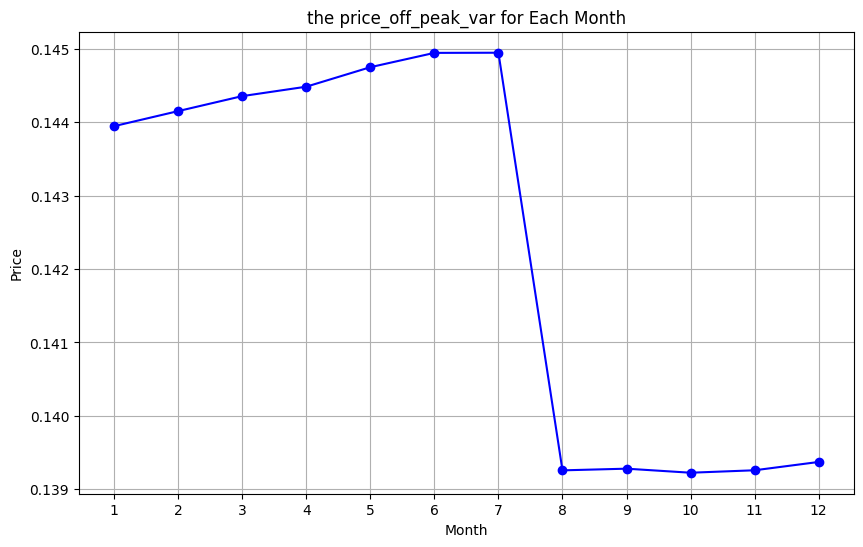

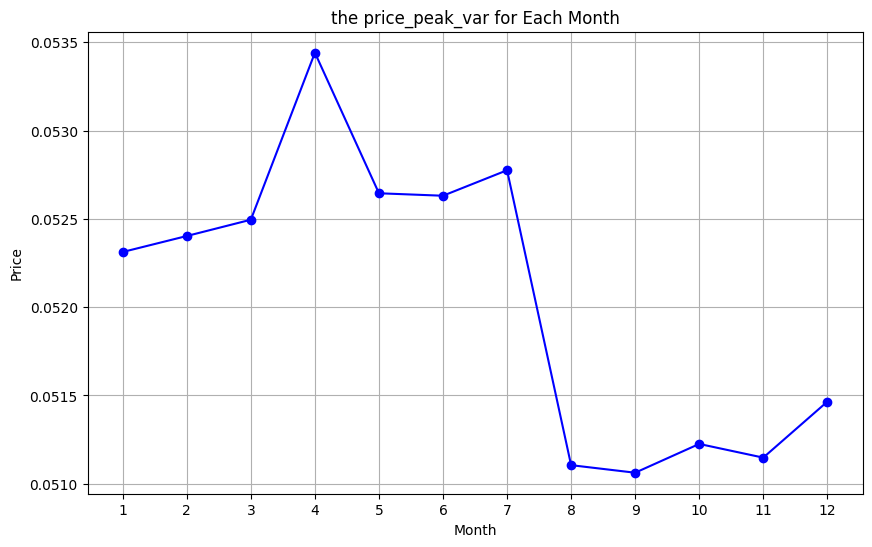

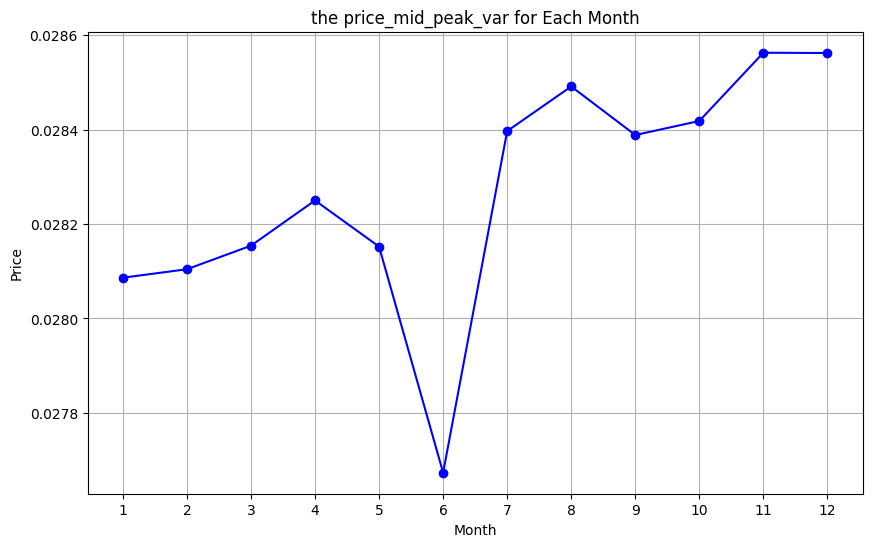

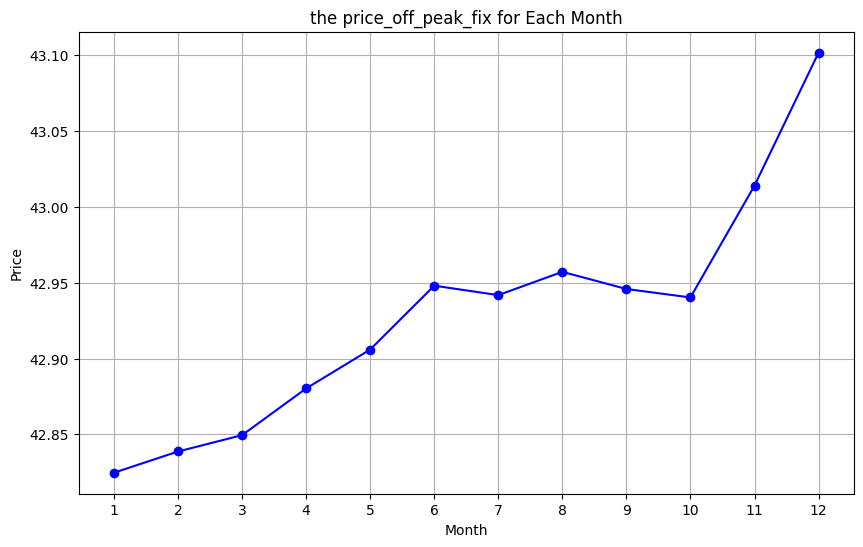

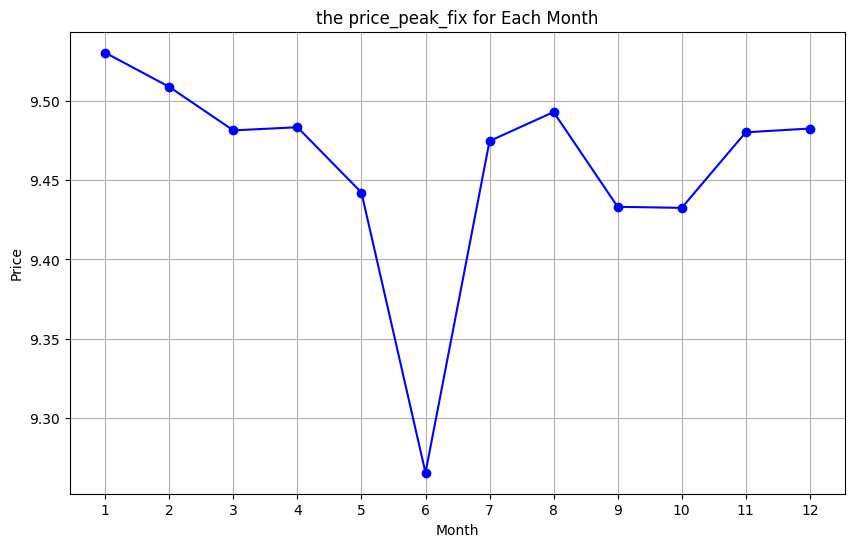

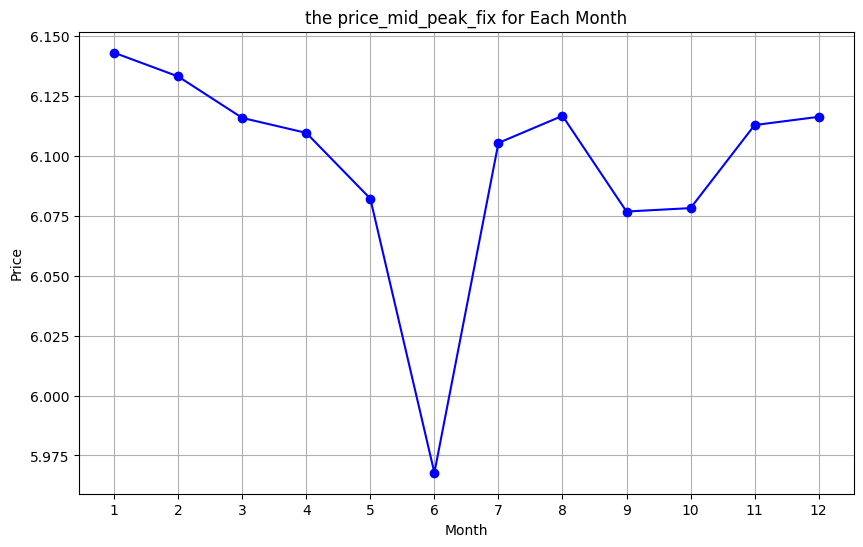

In [33]:
price_over_date_plot('price_off_peak_var')
price_over_date_plot('price_peak_var')
price_over_date_plot('price_mid_peak_var')
price_over_date_plot('price_off_peak_fix')
price_over_date_plot('price_peak_fix')
price_over_date_plot('price_mid_peak_fix')

In [34]:
monthly_prices

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
price_month,,,,,,,
1,0.143947,0.052312,0.028086,42.824700,9.530343,6.142967,1
2,0.144152,0.052403,0.028104,42.838696,9.508793,6.133069,1
3,0.144356,0.052495,0.028154,42.849473,9.481360,6.115785,1
4,0.144484,0.053441,0.028250,42.880276,9.483355,6.109533,1
5,0.144750,0.052645,0.028152,42.905926,9.442174,6.082113,1
6,0.144945,0.052631,0.027673,42.948033,9.265471,5.967808,1
7,0.144947,0.052775,0.028397,42.941808,9.474646,6.105351,1
8,0.139258,0.051105,0.028491,42.957162,9.492941,6.116645,1
9,0.139281,0.051062,0.028389,42.945850,9.433168,6.076743,1


👆 Despite the price increases, the majority of clients retained.

In [35]:
monthly_prices_2 = price_data_merged.groupby(['price_month','client_id']).agg(
    {
        'price_off_peak_var': 'mean',
        'price_peak_var': 'mean',
        'price_mid_peak_var': 'mean',
        'price_off_peak_fix': 'mean',
        'price_peak_fix': 'mean',
        'price_mid_peak_fix': 'mean',
        'churn': lambda x: x.mode()[0]
    }
)

In [36]:
monthly_prices_2=monthly_prices_2.reset_index('client_id')

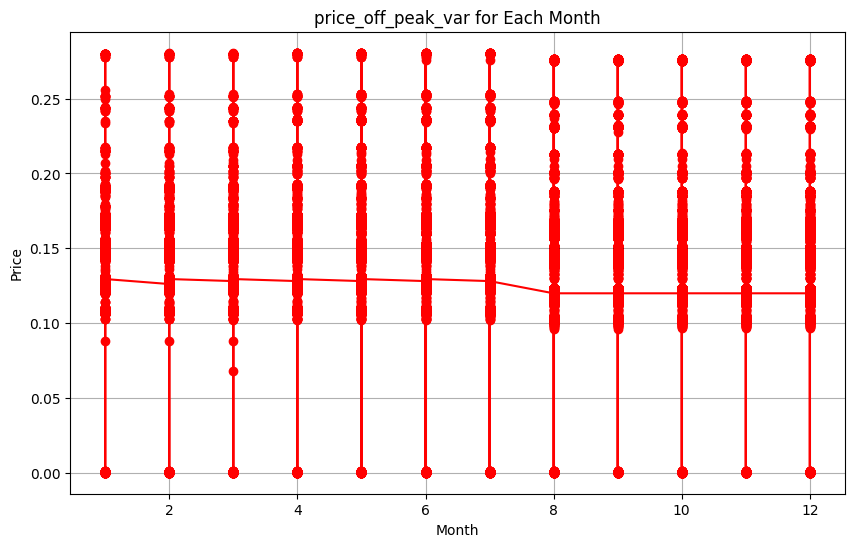

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_prices_2.index, monthly_prices_2['price_off_peak_var'], marker='o', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('price_off_peak_var for Each Month')

# Display the plot
plt.grid(True)
plt.show()
# Plot the data


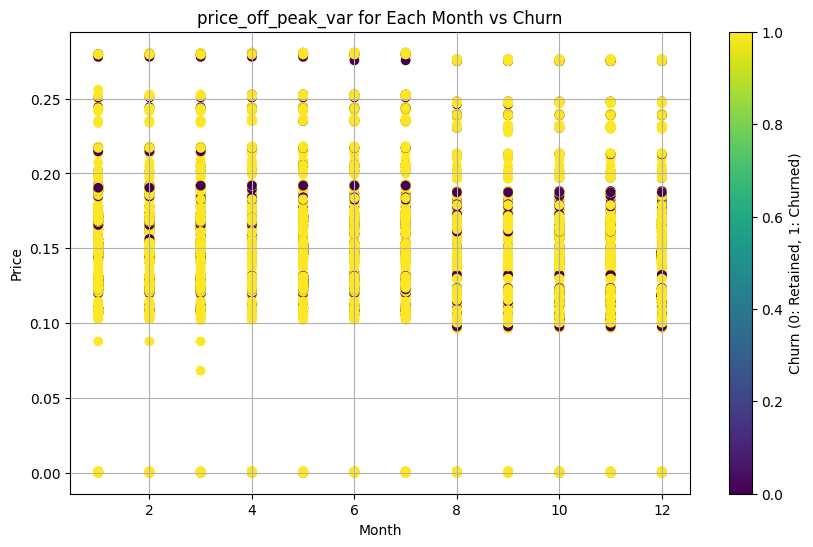

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_prices_2.index, monthly_prices_2['price_off_peak_var'], c=monthly_prices_2['churn'], cmap='viridis', marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('price_off_peak_var for Each Month vs Churn')

# Display color bar for churn values
plt.colorbar(label='Churn (0: Retained, 1: Churned)')

# Display the plot
plt.grid(True)
plt.show()


### 👆The above analysis and visualization shows that price is not the most influential factor in client churn.
However, this analysis may lack reliability due to the significant data imbalance between churned and retained clients. Therefore, I may consider performing a statistical test on the price features that is robust to data imbalance.

## Mann-Whitney U Test


The **Mann-Whitney U test** is a non-parametric test used to compare the distributions of two independent groups, in my case (`churn`, `Retain`)

The goal is to test whether the price distributions of these two groups are significantly different. This helps answer the question: `Are churned clients more price-sensitive than retained clients?`

Why Mann-Whitney U test?
- **Non-Normal Data**: Form the earliesr analysis, it seem that price data  does not follow a normal distribution. This makes the Mann-Whitney U test a great choice for comparing the distributions of churned vs. retained clients.
- **Handling Imbalanced Data**: The Mann-Whitney U test works well with imbalanced datasets (`like the 9.3% retained` vs. `9.7% churned ratio`). Even though the class distribution is skewed, the test compares the rank order of prices, so the imbalance in the number of clients does not distort the results significantly.




In [39]:
from scipy.stats import mannwhitneyu

In [40]:
price_columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

In [41]:
price_data_merged

,client_id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,forecasted_off_peak_energy_price,forecasted_peak_energy_price,forecasted_off_peak_power_price,price_month
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378,1
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378,2
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378,3
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378,4
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000,1,0.14398,0.000000,44.311378,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701,8
175145,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701,9
175146,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701,10
175147,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555,1,0.11691,0.100572,40.606701,11


In [42]:
# Perform Mann-Whitney U test for each price column
mann_whitney_results = {}
for price_col in price_columns:
    churned_prices = price_data_merged[price_data_merged['churn'] == 1][price_col]
    retained_prices = price_data_merged[price_data_merged['churn'] == 0][price_col]

    stat, p_value = mannwhitneyu(churned_prices, retained_prices)

    mann_whitney_results[price_col] = {
        'U-statistic': stat,
        'p-value': p_value
    }
    print(f'the p-value for {price_col} is {p_value} and the U-statistic is {stat}')


the p-value for price_off_peak_var is 8.627762886589234e-39 and the U-statistic is 1426078874.0
the p-value for price_peak_var is 9.344813280409521e-50 and the U-statistic is 1256773710.5
the p-value for price_mid_peak_var is 8.83753445769241e-84 and the U-statistic is 1238294724.0
the p-value for price_off_peak_fix is 4.672110402061941e-23 and the U-statistic is 1405523649.5
the p-value for price_peak_fix is 1.3487193702467496e-80 and the U-statistic is 1240907458.0
the p-value for price_mid_peak_fix is 2.481221976036442e-74 and the U-statistic is 1245114279.0


In [43]:
# Initialize variables to store the sum of U-statistics and p-values
total_u_stat = 0
total_p_value = 0
num_tests = len(mann_whitney_results)

# Iterate through the dictionary to extract U-statistics and p-values
for price_col, results in mann_whitney_results.items():
    total_u_stat += results['U-statistic']
    total_p_value += results['p-value']

# Calculate the averages
avg_u_stat = total_u_stat / num_tests
avg_p_value = total_p_value / num_tests

# Print the average values
print(f"Average U-statistic: {avg_u_stat}")
print(f"Average p-value: {avg_p_value}")


Average U-statistic: 1302115449.1666667
Average p-value: 7.786850670103236e-24


## 👇 Let's continue exploring against other features

### Consumption

In [44]:
client_df

,client_id,channel_sales,electricity_cons_12m,gas_cons_12m,electricity_cons_last_month,contract_activ_date,contract_end_date,last_product_modification_date,next_contract_renewal_date,electricity_forecast_cons_12m,...,has_gas,current_paid_cons,gross_margin_electricity_subscription,net_margin_electricity_subscription,active_products_and_services_count,total_net_margin,client_antiquity_years,initial_subscription_campaign_code,max_subscribed_power,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Retained
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Retained
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Retained
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,Retained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,Retained
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,Churned
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,Churned
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,Retained


In [45]:
consumption = client_df[['client_id', 'electricity_cons_12m', 'gas_cons_12m', 'electricity_cons_last_month', 'current_paid_cons','churn']]

In [46]:
consumption

,client_id,electricity_cons_12m,gas_cons_12m,electricity_cons_last_month,current_paid_cons,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,Retained
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,Retained
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,Retained
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,Retained
...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,0.00,Retained
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,15.94,Churned
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,18.05,Churned
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,Retained


In [47]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]=='Retained'][column],
    "Churn":dataframe[dataframe["churn"]=='Churned'][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

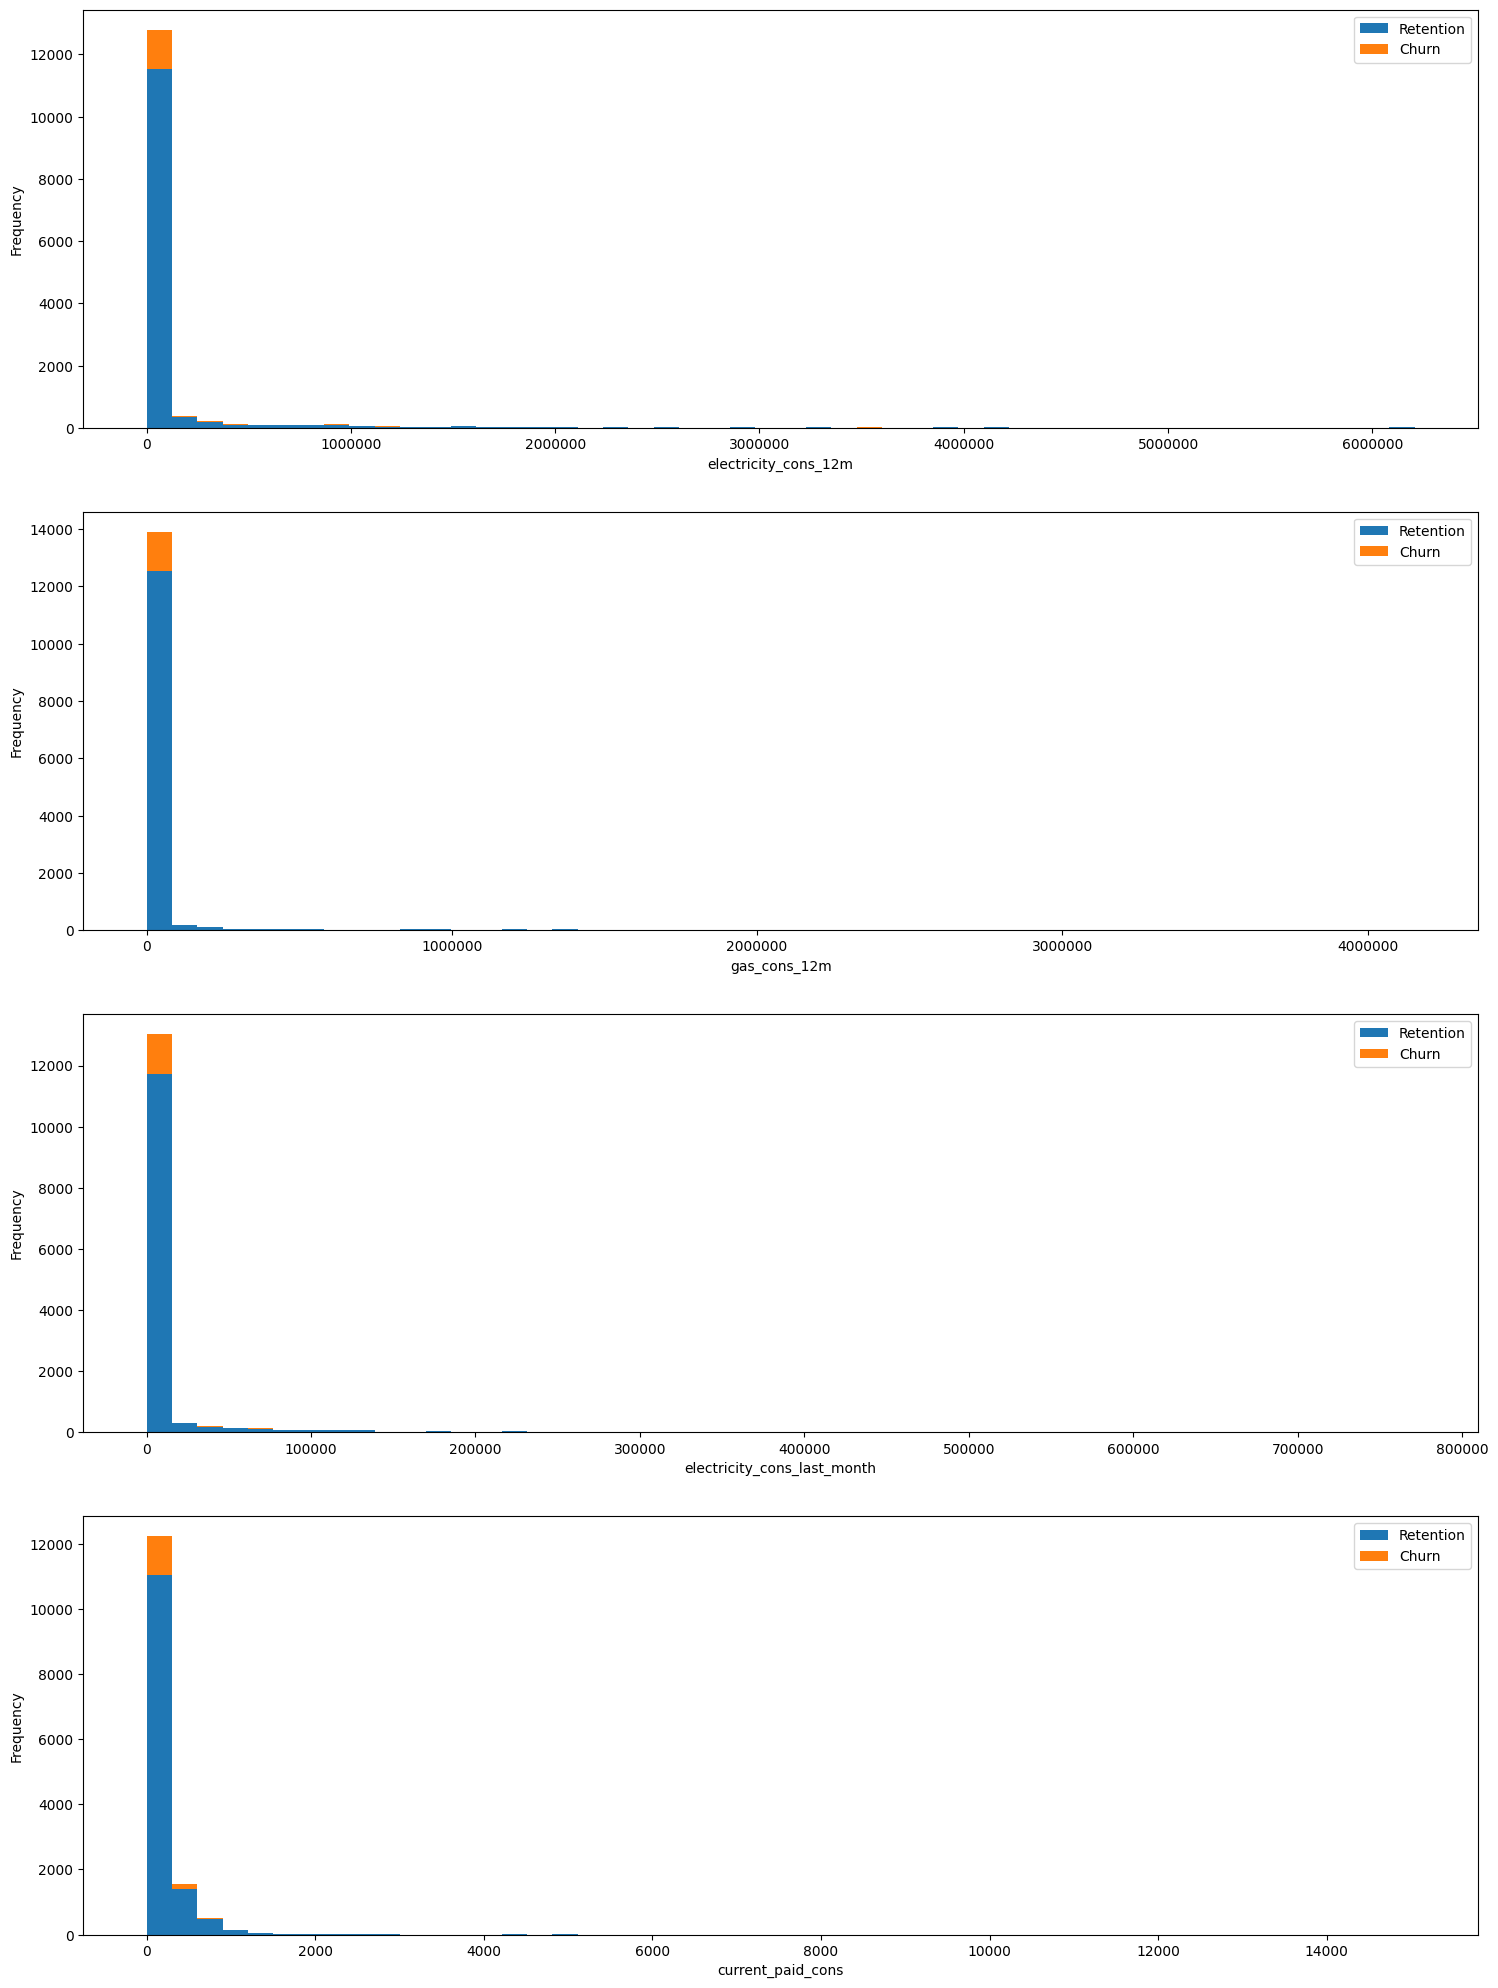

In [48]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'electricity_cons_12m', axs[0])
plot_distribution(consumption, 'gas_cons_12m', axs[1])
plot_distribution(consumption, 'electricity_cons_last_month', axs[2])
plot_distribution(consumption, 'current_paid_cons', axs[3])

## Contract Dates

# Clients's Antiquaty Years